In [9]:
import os
import mne
import numpy as np

In [10]:
print('MNE–Python version', mne.__version__)

MNE–Python version 1.7.1


### define inputs

In [11]:
sub_label = '02'
task_label = 'passive'
run_label = '1'

In [15]:
#data_dir = os.path.join('/Users/dsj3886/Library/CloudStorage/',
#                        'OneDrive-NorthwesternUniversity/',
#                        'Documents - SoundBrain Lab/Lab Research Projects/',
#                        'Experiments/',
#                        'NU_Experiments/EAM1/EEG_raw')
data_dir = os.path.join('/Users/dsj3886/Downloads',
                        #os.path.curdir, 
                        'EEG_raw')

bdf_path = os.path.join(data_dir,
                        f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')

#out_dir = []


### load EEG data

In [16]:
data = mne.io.read_raw_bdf(bdf_path, preload=True)

Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-passive_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10551295  =      0.000 ...   644.000 secs...


In [17]:
print(data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


Using matplotlib as 2D backend.


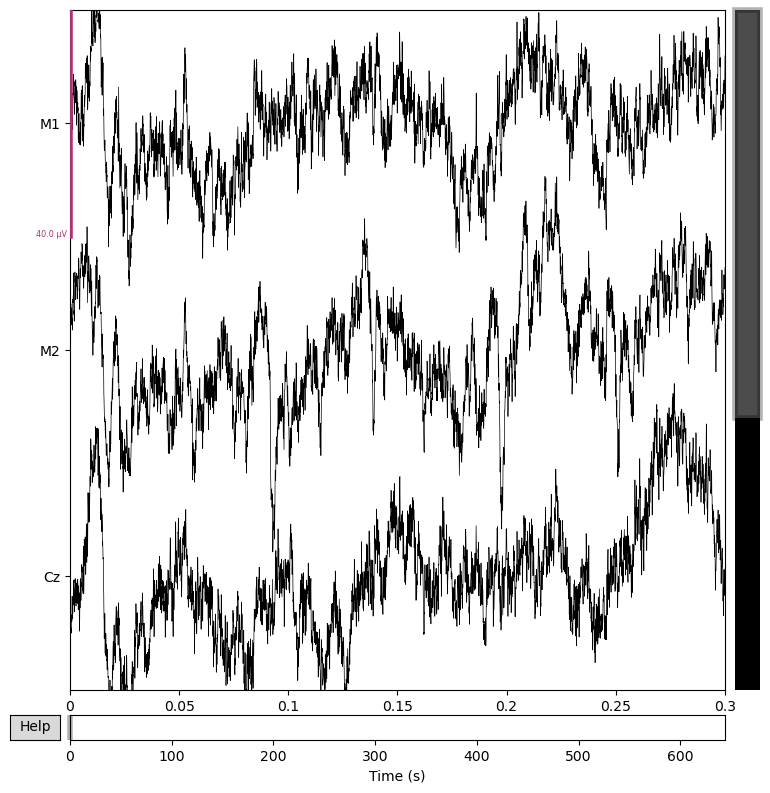

In [18]:
data.plot(duration=0.3, 
          n_channels=3,
          remove_dc=True);

### set reference channels

In [19]:
data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [20]:
print(data_ref.info)

<Info | 9 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


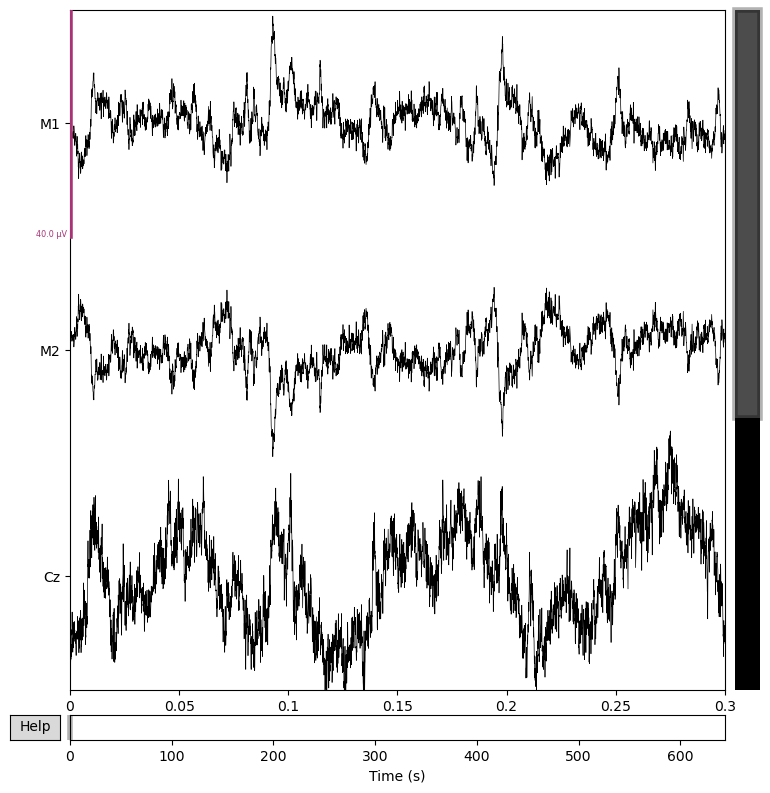

In [21]:
data_ref.plot(duration=0.3, 
              n_channels=3, 
              remove_dc=True);

### filter data

In [22]:
data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)



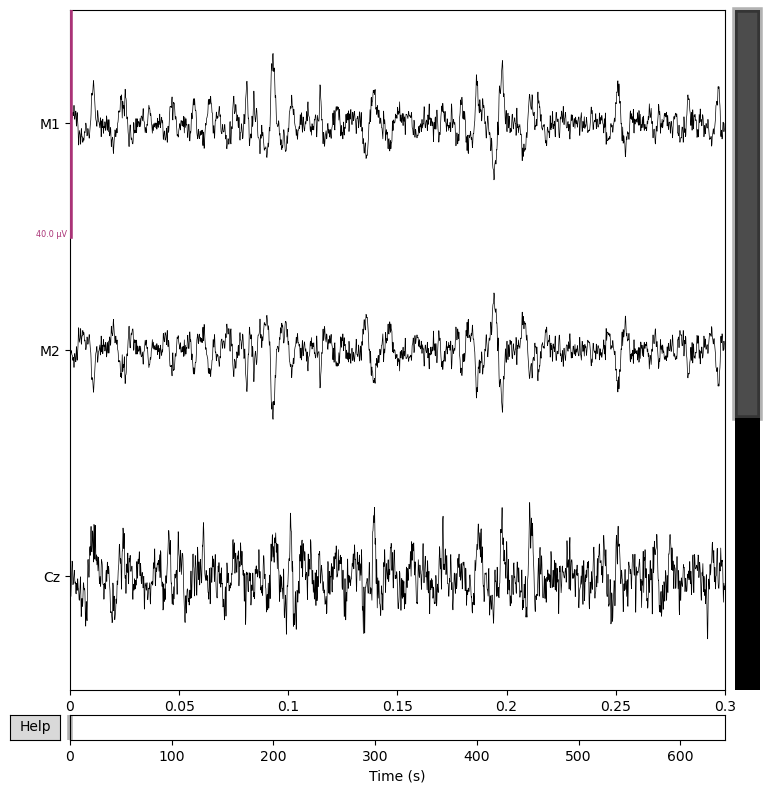

In [23]:
data_filtered.plot(duration=0.3, 
                   n_channels=3, 
                   remove_dc=True);

### Find events in the trigger channel

In [24]:
events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)

1202 events found on stim channel Status
Event IDs: [ 2049  2050  2177  2303 67584]


In [25]:
event_dict = {'pol_positive': 2049,
              'pol_negative': 2050}

In [26]:
events

array([[       0,        0,    67584],
       [  147531,     2048,     2303],
       [  148041,     2048,     2049],
       ...,
       [10399756,     2048,     2050],
       [10408613,     2048,     2049],
       [10415744,     2048,     2050]])

In [27]:
# unique_events, unique_indices, unique_inverse, count_events = 
unique, counts = np.unique(events[:,2], return_counts=True)
print(unique)
print(counts)


[ 2049  2050  2177  2303 67584]
[597 600   3   1   1]


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/311438277.py:1: RuntimeWarning: event 2177 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/311438277.py:1: RuntimeWarning: event 2303 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/311438277.py:1: RuntimeWarning: event 67584 missing from event_id will be ignored
  fig = mne.viz.plot_events(


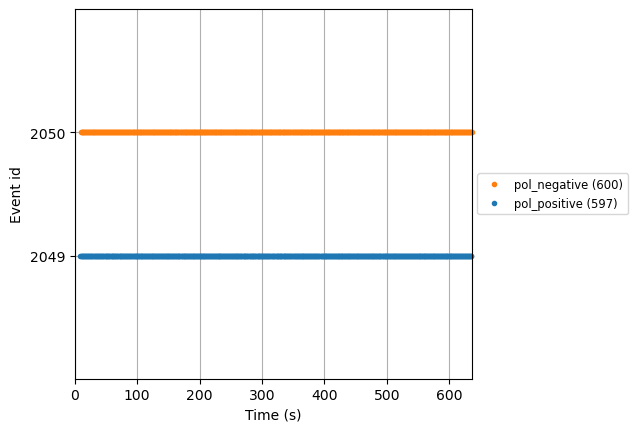

In [28]:
fig = mne.viz.plot_events(
    events, event_id=event_dict, sfreq=data_filtered.info["sfreq"], first_samp=data_filtered.first_samp
)

### Epoch the data based on events

In [29]:
epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75e-6)).drop_bad()


Not setting metadata
1197 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1197 events and 5571 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
10 bad epochs dropped


In [31]:
epochs.drop_log[:10]

(('IGNORED',), ('IGNORED',), (), (), (), (), (), (), (), ())

In [32]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 highpass: 70.0 Hz
 lowpass: 2000.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 1
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


Using data from preloaded Raw for 5 events and 5571 original time points ...


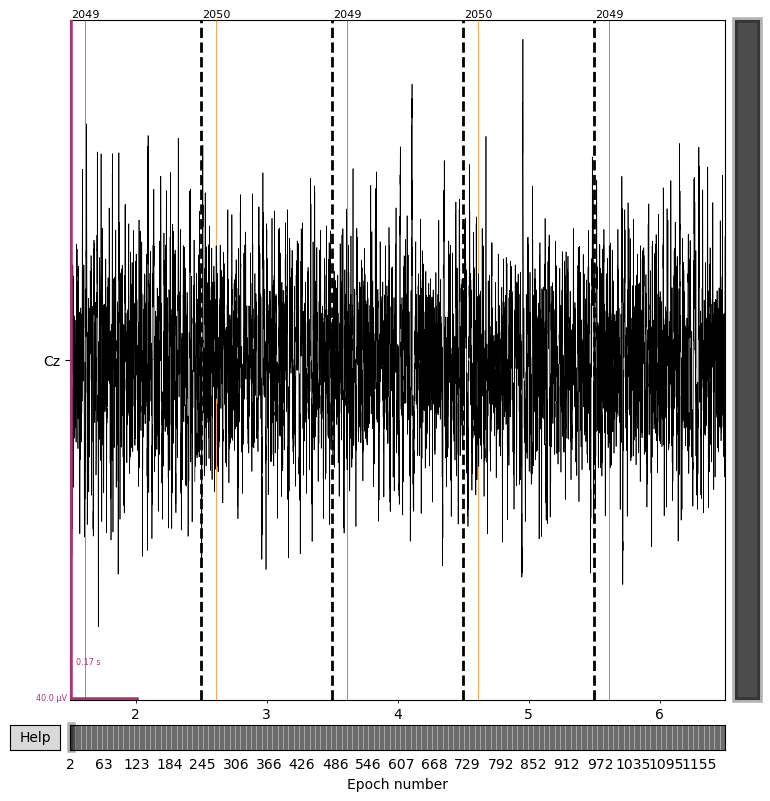

In [33]:
epochs.plot(n_epochs = 5, # len(epochs), 
            #picks = ['M1', 'M2'],
            events = True);

In [34]:
# save epoched data to a new file
#epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)

### Created `Evoked` from `Epochs`

In [35]:
evoked = epochs.average()

In [36]:
evoked

Condition,0.50 × pol_positive + 0.50 × pol_negative
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1187
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


In [37]:
print(f"Epochs baseline: {epochs.baseline}")
print(f"Evoked baseline: {evoked.baseline}")

Epochs baseline: (-0.04, 0.0)
Evoked baseline: (-0.04, 0.0)


Need more than one channel to make topography for eeg. Disabling interactivity.


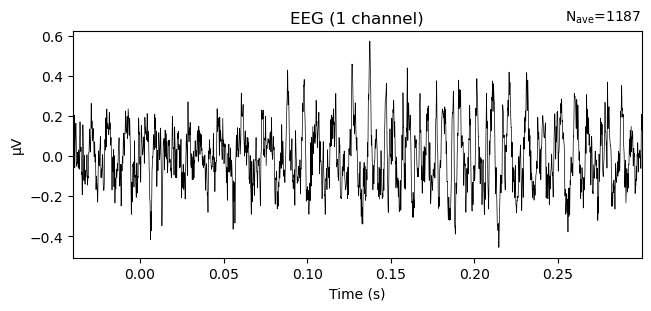

In [38]:
evoked.plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2912148068.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked_psd.plot()
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/2912148068.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_psd.plot()
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


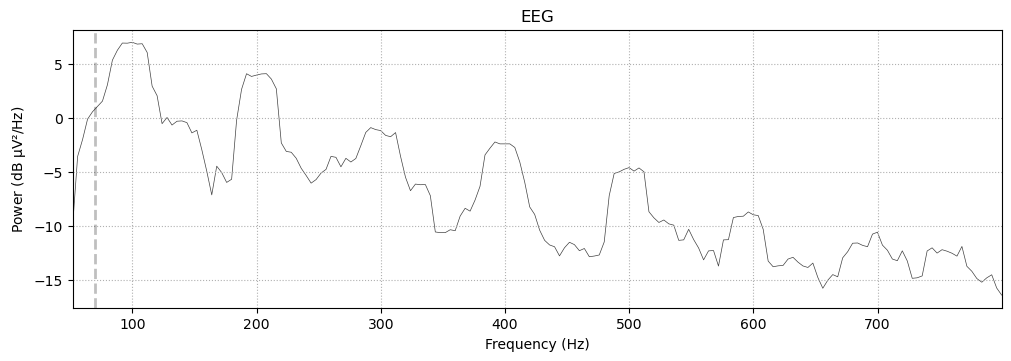

In [39]:
evoked_psd = evoked.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot()

No baseline correction applied


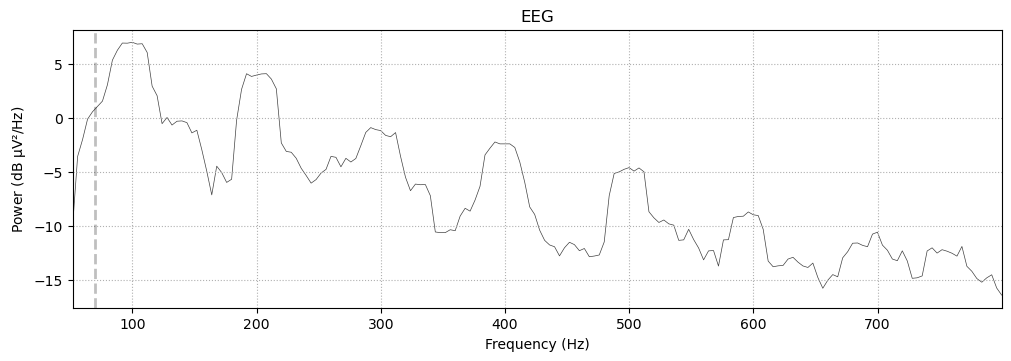

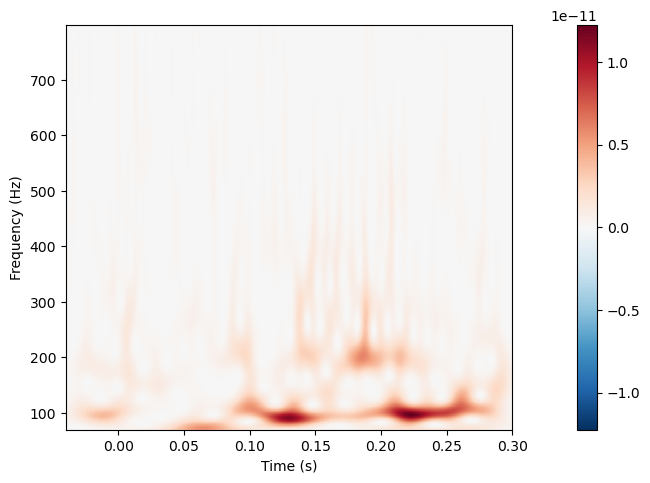

In [40]:
frequencies = np.arange(70,800)
power = evoked.compute_tfr("morlet", freqs=frequencies)
power.plot(); # ['M2']

# Combine multiple runs

In [51]:
sub_label = '02'
task_label = 'passive'
run_labels = ['1','2']

#data_dir = os.path.join('/Users/dsj3886/Library/CloudStorage/',
#                        'OneDrive-NorthwesternUniversity/',
#                        'Documents - SoundBrain Lab/Lab Research Projects/',
#                        'Experiments/',
#                        'NU_Experiments/EAM1/EEG_raw')
data_dir = os.path.join('/Users/dsj3886/Downloads',
                        #os.path.curdir, 
                        'EEG_raw')

#out_dir = []

In [52]:
event_dict = {'pol_positive': 2049,
              'pol_negative': 2050}

In [53]:
epoch_list = []
for run_label in run_labels:
    # define one EEG data file path
    bdf_path = os.path.join(data_dir, f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
    
    # load in EEG data
    data = mne.io.read_raw_bdf(bdf_path, preload=True)
    
    # re-reference data to linked mastoid reference
    data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
    
    # filter data
    data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)
    
    # find events
    events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)
    
    # epoch data based on stimulus events
    epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75e-6)).drop_bad()
    
    epoch_list.append(epochs)

Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-passive_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10551295  =      0.000 ...   644.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

1202 events found on stim channel Status
Event IDs: [ 2049  2050  2177  2303 67584]
Not setting metadata

In [54]:
all_epochs = mne.concatenate_epochs(epoch_list)
epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite = True)

all_evoked = all_epochs.average()

Using data from preloaded Raw for 1187 events and 5571 original time points ...
Using data from preloaded Raw for 1191 events and 5571 original time points ...
Not setting metadata
2378 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1 events and 5571 original time points ...
Using data from preloaded Raw for 1191 events and 5571 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/929938895.py:2: RuntimeWarning: This filename (sub-02_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite = True)


Need more than one channel to make topography for eeg. Disabling interactivity.


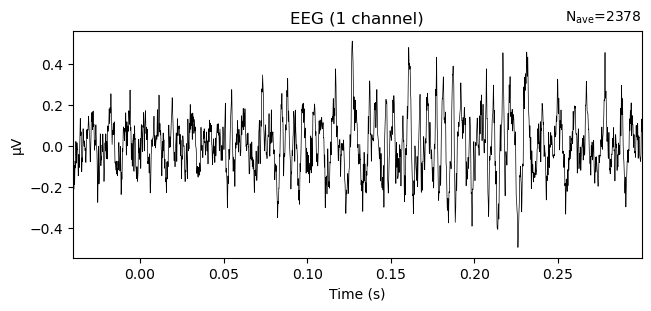

In [58]:
all_evoked.plot();

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/3418018878.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked_psd.plot()
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_94118/3418018878.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_psd.plot()
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


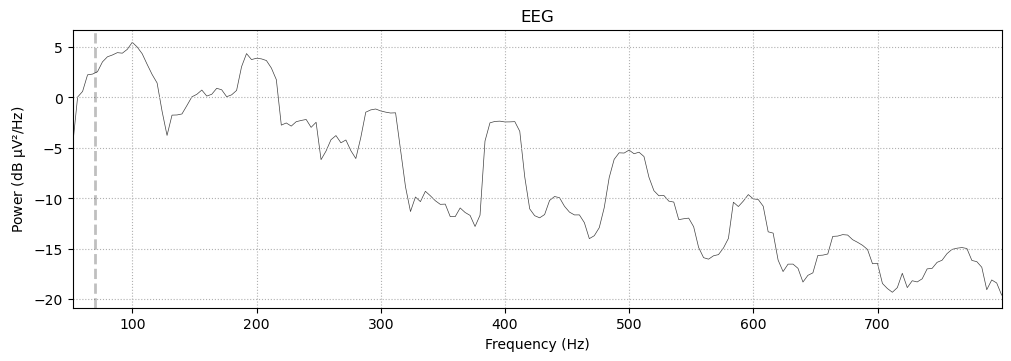

In [59]:
evoked_psd = all_evoked.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot()

No baseline correction applied


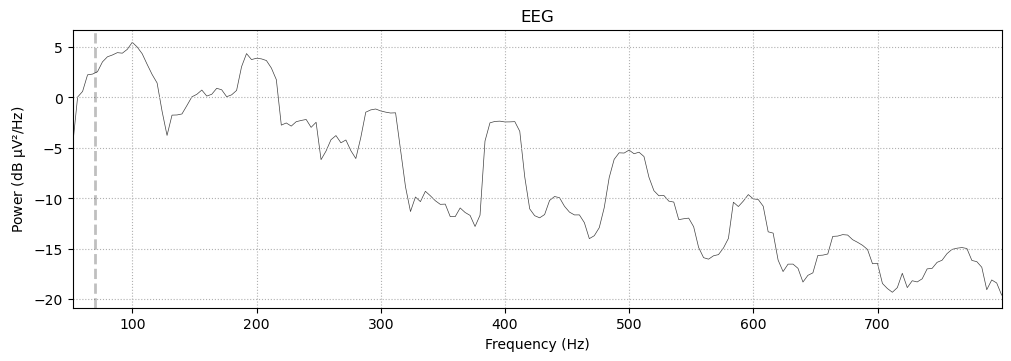

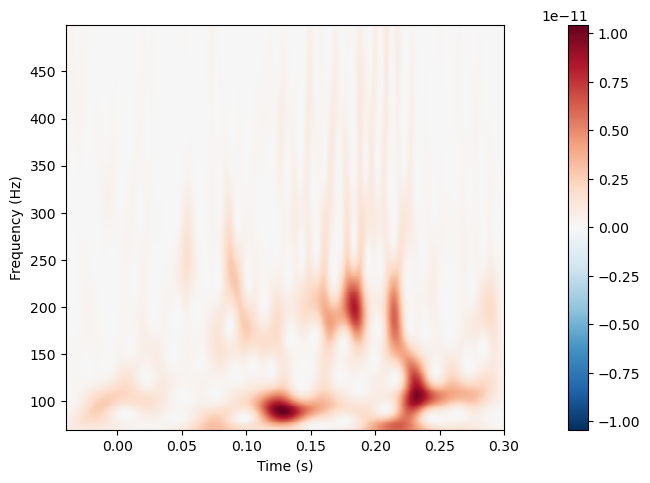

In [60]:
frequencies = np.arange(70,500)
power = all_evoked.compute_tfr("morlet", freqs=frequencies)
power.plot();

## Autocorrelation

In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [62]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

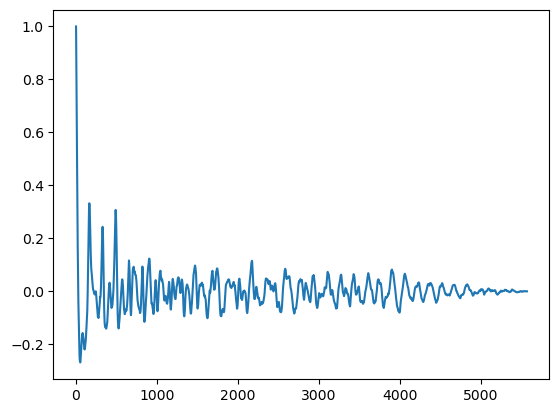

In [63]:
plt.plot(acf)
plt.show()

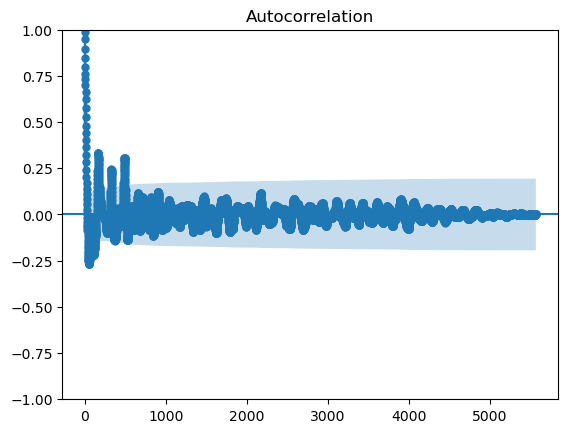

In [64]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## Stimulus–response correlations


In [75]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:48:10 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [73]:
stim_data = data.pick(['Erg1']).get_data()

In [74]:
stim_data

array([[0.01426252, 0.0143043 , 0.01432389, ..., 0.01529278, 0.01537566,
        0.01536788]])